In [2]:
import cv2
import tensorflow as tf
import mediapipe as mp
import sklearn
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%config Completer.use_jedi = False

In [4]:
mp_holistic = mp.solutions.holistic
mp_drawings = mp.solutions.drawing_utils

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawings.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS)
    mp_drawings.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    mp_drawings.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawings.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [17]:
cap = cv2.VideoCapture("video1.avi")

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        success, frame = cap.read()
        
#         image, results = mediapipe_detection(frame, holistic)
#         print(results)

#         draw_landmarks(image, results)
        
        if success == True:
            image, results = mediapipe_detection(frame, holistic)
            draw_landmarks(image, results)
            
            cv2.imshow("video", image)
            key = cv2.waitKey(1)
            if key == ord('q'):
                break

        else:
            break
        
cap.release()
cv2.destroyAllWindows()

In [7]:
cap.release()
cv2.destroyAllWindows()

In [18]:
results.face_landmarks.landmark

[x: 0.4230162501335144
y: 0.2606736719608307
z: -0.007838225923478603
, x: 0.4338786005973816
y: 0.23819033801555634
z: -0.018672246485948563
, x: 0.42365071177482605
y: 0.24437245726585388
z: -0.008887231349945068
, x: 0.42710697650909424
y: 0.2129898965358734
z: -0.01895330473780632
, x: 0.43536731600761414
y: 0.23080986738204956
z: -0.020329225808382034
, x: 0.43359413743019104
y: 0.22077533602714539
z: -0.019439266994595528
, x: 0.4263854920864105
y: 0.19469483196735382
z: -0.01164999045431614
, x: 0.3835662305355072
y: 0.18704921007156372
z: -0.023309001699090004
, x: 0.42561250925064087
y: 0.17388921976089478
z: -0.01014998834580183
, x: 0.42730721831321716
y: 0.16367456316947937
z: -0.01141287386417389
, x: 0.42626386880874634
y: 0.1274241805076599
z: -0.010311375372111797
, x: 0.42217859625816345
y: 0.264131635427475
z: -0.007099139504134655
, x: 0.4206997752189636
y: 0.2667660117149353
z: -0.005705277435481548
, x: 0.4189296364784241
y: 0.26784610748291016
z: -0.00392137514427

In [19]:
len(results.face_landmarks.landmark)

468

In [20]:
results.pose_landmarks.landmark

[x: 0.42641592025756836
y: 0.227002814412117
z: -0.3952248692512512
visibility: 0.999937891960144
, x: 0.42633017897605896
y: 0.18914714455604553
z: -0.346204936504364
visibility: 0.9998963475227356
, x: 0.43001651763916016
y: 0.18948407471179962
z: -0.3462899327278137
visibility: 0.9999012351036072
, x: 0.4336724281311035
y: 0.18981438875198364
z: -0.3465622067451477
visibility: 0.9998568892478943
, x: 0.4082769453525543
y: 0.18636329472064972
z: -0.39984235167503357
visibility: 0.9999271631240845
, x: 0.39685148000717163
y: 0.18451948463916779
z: -0.39997023344039917
visibility: 0.9999353289604187
, x: 0.38548678159713745
y: 0.18259042501449585
z: -0.4003659784793854
visibility: 0.9999285936355591
, x: 0.41530442237854004
y: 0.2046482115983963
z: -0.07632820308208466
visibility: 0.9998838901519775
, x: 0.3427979350090027
y: 0.19280844926834106
z: -0.333400696516037
visibility: 0.999981164932251
, x: 0.4255402684211731
y: 0.26428526639938354
z: -0.28851038217544556
visibility: 0.99994

In [21]:
len(results.pose_landmarks.landmark)

33

In [22]:
draw_landmarks(frame, results)

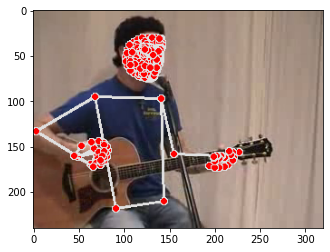

In [37]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [25]:
results.left_hand_landmarks.landmark

[x: 0.6091203093528748
y: 0.7161320447921753
z: -2.3720434683127678e-07
, x: 0.635884702205658
y: 0.6959254145622253
z: -6.69235159875825e-05
, x: 0.6582043170928955
y: 0.680397629737854
z: -0.003014548448845744
, x: 0.6706832051277161
y: 0.6657302379608154
z: -0.007104980293661356
, x: 0.6767740249633789
y: 0.6519959568977356
z: -0.011231019161641598
, x: 0.6738336682319641
y: 0.708772599697113
z: -0.007612621411681175
, x: 0.687527060508728
y: 0.6896538138389587
z: -0.017132697626948357
, x: 0.6842311024665833
y: 0.6657732725143433
z: -0.022980542853474617
, x: 0.6776038408279419
y: 0.6483668684959412
z: -0.0262584388256073
, x: 0.6608137488365173
y: 0.7185938358306885
z: -0.012608038261532784
, x: 0.659564197063446
y: 0.6782412528991699
z: -0.020768586546182632
, x: 0.6509972810745239
y: 0.6685969233512878
z: -0.02266707457602024
, x: 0.6472582817077637
y: 0.66953045129776
z: -0.024303456768393517
, x: 0.6433357000350952
y: 0.7223674654960632
z: -0.017993537709116936
, x: 0.64067530

In [26]:
len(results.left_hand_landmarks.landmark)

21

In [27]:
results.right_hand_landmarks.landmark

[x: 0.1413263976573944
y: 0.6694095730781555
z: -1.9433217346431775e-07
, x: 0.16671904921531677
y: 0.6245280504226685
z: -0.004545350559055805
, x: 0.20169734954833984
y: 0.605003833770752
z: -0.005218326114118099
, x: 0.22770094871520996
y: 0.6037983298301697
z: -0.0062187910079956055
, x: 0.24453914165496826
y: 0.610942542552948
z: -0.005442195106297731
, x: 0.22673608362674713
y: 0.6520849466323853
z: 0.0021252103615552187
, x: 0.2572202980518341
y: 0.6441490054130554
z: -0.0014273275155574083
, x: 0.2557171583175659
y: 0.6266260743141174
z: -0.004980436526238918
, x: 0.24563781917095184
y: 0.6173613667488098
z: -0.006191436201334
, x: 0.22368931770324707
y: 0.6809098720550537
z: 0.0022816110868006945
, x: 0.25382059812545776
y: 0.6719581484794617
z: 0.001998505089432001
, x: 0.2530169188976288
y: 0.6547927856445312
z: 0.0005226807552389801
, x: 0.24411499500274658
y: 0.6462380290031433
z: -0.00019878821331076324
, x: 0.21676713228225708
y: 0.7029653787612915
z: 0.00151705846656113

In [28]:
len(results.right_hand_landmarks.landmark)

21

In [54]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)

In [55]:
pose.shape

(132,)

In [43]:
left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark ]).flatten() if results.left_hand_landmarks else np.zeros(21*3)

In [44]:
left_hand.shape

(63,)

In [45]:
right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark ]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [46]:
right_hand.shape

(63,)

In [52]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)

In [53]:
face.shape

(1404,)

In [51]:
face

array([ 0.42301625,  0.26067367, -0.00783823, ...,  0.43879807,
        0.1827542 ,  0.02915338])

In [57]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    left_hand = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark ]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    right_hand = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark ]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    
    return np.concatenate([pose, face, left_hand, right_hand])

In [59]:
extract_keypoints(results).shape

(1662,)

In [60]:
DATA_PATH = os.path.join("DATA")
actions = np.array(['playing_guitar', 'playing_violin', 'riding_bicycle'])

no_sequences = 30     # thirty videos
sequence_length = 30     # videos are 30 frames in length

In [ ]:
for action in actions:
    

In [68]:
# results.pose_landmarks.landmark
for i in range(len(results.pose_landmarks.landmark)):
    print(i, results.pose_landmarks.landmark[i])

0 x: 0.42641592025756836
y: 0.227002814412117
z: -0.3952248692512512
visibility: 0.999937891960144

1 x: 0.42633017897605896
y: 0.18914714455604553
z: -0.346204936504364
visibility: 0.9998963475227356

2 x: 0.43001651763916016
y: 0.18948407471179962
z: -0.3462899327278137
visibility: 0.9999012351036072

3 x: 0.4336724281311035
y: 0.18981438875198364
z: -0.3465622067451477
visibility: 0.9998568892478943

4 x: 0.4082769453525543
y: 0.18636329472064972
z: -0.39984235167503357
visibility: 0.9999271631240845

5 x: 0.39685148000717163
y: 0.18451948463916779
z: -0.39997023344039917
visibility: 0.9999353289604187

6 x: 0.38548678159713745
y: 0.18259042501449585
z: -0.4003659784793854
visibility: 0.9999285936355591

7 x: 0.41530442237854004
y: 0.2046482115983963
z: -0.07632820308208466
visibility: 0.9998838901519775

8 x: 0.3427979350090027
y: 0.19280844926834106
z: -0.333400696516037
visibility: 0.999981164932251

9 x: 0.4255402684211731
y: 0.26428526639938354
z: -0.28851038217544556
visibilit